In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label) = mnist.load_data()  # 讀取mnist 資料

In [3]:
x_Train=x_train_image.reshape(60000,784).astype('float32')# features reshape轉換
x_Test=x_test_image.reshape(10000,784).astype('float32')

x_Train_normalize = x_Train / 255 #像素255 / 255標準化
x_Test_normalize = x_Test / 255

In [4]:
y_Train_Onehot = np_utils.to_categorical(y_train_label) #label0～9個數字進行One-encondind轉換
y_Test_Onehot = np_utils.to_categorical(y_test_label)

In [5]:
from keras.models import Sequential#序列化
from keras.layers import Dense #感知器演算法
model = Sequential()#建立序列化模型
##建立輸入層與隱藏層
model.add(Dense(units=1000,#隱藏層神經元1000
               input_dim=784,#設定輸入層神經元784個(28*28的二維影像 reshape轉換為一維的向量也就是784float數字)
               kernel_initializer='normal',#使用normal disribution常態分佈的亂數 初始化weight(權重)bias(偏差量)
               activation = 'relu'))#定義激活函數為relu

In [6]:
##建立輸出層
model.add(Dense(units=10,#定義輸出層神經元10個
                kernel_initializer='normal',#使用normal disribution常態分佈的亂數 初始化weight(權重)bias(偏差量)
                activation='softmax'))#定義激活函數為softmaxb

In [7]:
##查看模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
##定義訓練方式  用model compile function對訓練模型進行設定
model.compile(loss='categorical_crossentropy',##設定損失函數 深度學習 都用cross entropy 交叉熵訓練
              optimizer='adam',##設定訓練最優化 深度學習以adam方法 可以更快收斂 
              metrics=['accuracy'])##評估模型的方式是accuracy(準確率) 

In [9]:
##執行訓練
train_history = model.fit(x = x_Train_normalize,#數字影像 feature value
                          y = y_Train_Onehot, #數字影像 真實的標籤
                          validation_split=0.2,#將訓練資料分成80%為訓練資料,20%為驗證資料
                          epochs=10,#執行訓練週期10次 
                          batch_size=200,#每一批次為200筆資料
                          verbose=2)#顯示訓練過程
##epochs(訓練週期)每次訓練週期結束 會計算此週期的準確率(accuracy)和誤差(loss)新增到train)history中

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
5s - loss: 0.2943 - acc: 0.9153 - val_loss: 0.1527 - val_acc: 0.9568
Epoch 2/10
4s - loss: 0.1178 - acc: 0.9659 - val_loss: 0.1074 - val_acc: 0.9673
Epoch 3/10
4s - loss: 0.0757 - acc: 0.9786 - val_loss: 0.0921 - val_acc: 0.9728
Epoch 4/10
5s - loss: 0.0514 - acc: 0.9854 - val_loss: 0.0872 - val_acc: 0.9734
Epoch 5/10
5s - loss: 0.0356 - acc: 0.9906 - val_loss: 0.0757 - val_acc: 0.9756
Epoch 6/10
4s - loss: 0.0255 - acc: 0.9934 - val_loss: 0.0744 - val_acc: 0.9773
Epoch 7/10
5s - loss: 0.0184 - acc: 0.9960 - val_loss: 0.0729 - val_acc: 0.9796
Epoch 8/10
4s - loss: 0.0131 - acc: 0.9974 - val_loss: 0.0702 - val_acc: 0.9790
Epoch 9/10
4s - loss: 0.0087 - acc: 0.9987 - val_loss: 0.0719 - val_acc: 0.9793
Epoch 10/10
5s - loss: 0.0064 - acc: 0.9991 - val_loss: 0.0719 - val_acc: 0.9800


In [10]:
##建立show_train_history過程
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Eproch')
    plt.legend(['train','validation'], loc='upper left')#設定legend圖例為train(訓練) validation(驗證) loc位置在左上方
    plt.show()

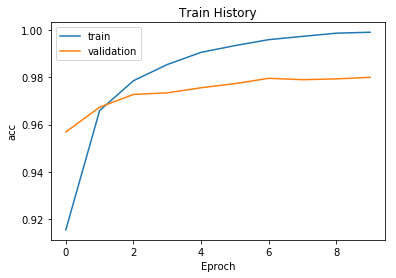

In [11]:
show_train_history(train_history,'acc','val_acc')

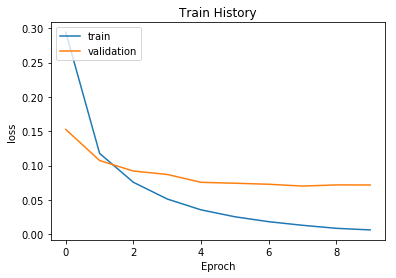

In [12]:
#畫出誤差圖形
show_train_history(train_history,'loss','val_loss')

In [14]:
from keras.models import Sequential#序列化
from keras.layers import Dense #感知器演算法
from keras.layers import Dropout
model = Sequential()#建立序列化模型
##建立輸入層與隱藏層
model.add(Dense(units=1000,#隱藏層神經元1000
               input_dim=784,#設定輸入層神經元784個(28*28的二維影像 reshape轉換為一維的向量也就是784float數字)
               kernel_initializer='normal',#使用normal disribution常態分佈的亂數 初始化weight(權重)bias(偏差量)
               activation = 'relu'))#定義激活函數為relu

model.add(Dropout(0.5))#每次訓練迭代時隨機放棄50%神經元以避免overfitting
model.add(Dense(units=10,#定義輸出層神經元10個
                kernel_initializer='normal',#使用normal disribution常態分佈的亂數 初始化weight(權重)bias(偏差量)
                activation='softmax'))#定義激活函數為softmaxb

In [15]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
##定義訓練方式  用model compile function對訓練模型進行設定
model.compile(loss='categorical_crossentropy',##設定損失函數 深度學習 都用cross entropy 交叉熵訓練
              optimizer='adam',##設定訓練最優化 深度學習以adam方法 可以更快收斂 
              metrics=['accuracy'])##評估模型的方式是accuracy(準確率) 
##執行訓練
train_history = model.fit(x = x_Train_normalize,#數字影像 feature value
                          y = y_Train_Onehot, #數字影像 真實的標籤
                          validation_split=0.2,#將訓練資料分成80%為訓練資料,20%為驗證資料
                          epochs=10,#執行訓練週期10次 
                          batch_size=200,#每一批次為200筆資料
                          verbose=2)#顯示訓練過程
##epochs(訓練週期)每次訓練週期結束 會計算此週期的準確率(accuracy)和誤差(loss)新增到train)history中

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
5s - loss: 0.3523 - acc: 0.8929 - val_loss: 0.1671 - val_acc: 0.9537
Epoch 2/10
5s - loss: 0.1594 - acc: 0.9527 - val_loss: 0.1192 - val_acc: 0.9659
Epoch 3/10
5s - loss: 0.1164 - acc: 0.9652 - val_loss: 0.0941 - val_acc: 0.9721
Epoch 4/10
5s - loss: 0.0912 - acc: 0.9733 - val_loss: 0.0852 - val_acc: 0.9738
Epoch 5/10
5s - loss: 0.0761 - acc: 0.9767 - val_loss: 0.0783 - val_acc: 0.9759
Epoch 6/10
5s - loss: 0.0639 - acc: 0.9809 - val_loss: 0.0736 - val_acc: 0.9784
Epoch 7/10
5s - loss: 0.0521 - acc: 0.9847 - val_loss: 0.0764 - val_acc: 0.9763
Epoch 8/10
5s - loss: 0.0500 - acc: 0.9842 - val_loss: 0.0684 - val_acc: 0.9795
Epoch 9/10
5s - loss: 0.0435 - acc: 0.9866 - val_loss: 0.0658 - val_acc: 0.9803
Epoch 10/10
5s - loss: 0.0366 - acc: 0.9888 - val_loss: 0.0664 - val_acc: 0.9803


In [19]:
model = Sequential()#建立序列化模型
##建立輸入層與隱藏層
model.add(Dense(units=1000,#隱藏層神經元1000
               input_dim=784,#設定輸入層神經元784個(28*28的二維影像 reshape轉換為一維的向量也就是784float數字)
               kernel_initializer='normal',#使用normal disribution常態分佈的亂數 初始化weight(權重)bias(偏差量)
               activation = 'relu'))#定義激活函數為relu
#建立第二層隱藏層
model.add(Dense(units=1000,#隱藏層神經元1000
               kernel_initializer='normal',#使用normal disribution常態分佈的亂數 初始化weight(權重)bias(偏差量)
               activation = 'relu'))#定義激活函數為relu
model.add(Dropout(0.5))#每次訓練迭代時隨機放棄50%神經元以避免overfitting
model.add(Dense(units=10,#定義輸出層神經元10個
                kernel_initializer='normal',#使用normal disribution常態分佈的亂數 初始化weight(權重)bias(偏差量)
                activation='softmax'))#定義激活函數為softmaxb

In [20]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
#定義訓練方式  用model compile function對訓練模型進行設定
model.compile(loss='categorical_crossentropy',##設定損失函數 深度學習 都用cross entropy 交叉熵訓練
              optimizer='adam',##設定訓練最優化 深度學習以adam方法 可以更快收斂 
              metrics=['accuracy'])##評估模型的方式是accuracy(準確率) 
##執行訓練
train_history = model.fit(x = x_Train_normalize,#數字影像 feature value
                          y = y_Train_Onehot, #數字影像 真實的標籤
                          validation_split=0.2,#將訓練資料分成80%為訓練資料,20%為驗證資料
                          epochs=10,#執行訓練週期10次 
                          batch_size=200,#每一批次為200筆資料
                          verbose=2)#顯示訓練過程
##epochs(訓練週期)每次訓練週期結束 會計算此週期的準確率(accuracy)和誤差(loss)新增到train)histor

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
11s - loss: 0.2677 - acc: 0.9179 - val_loss: 0.1135 - val_acc: 0.9668
Epoch 2/10
10s - loss: 0.0984 - acc: 0.9705 - val_loss: 0.1021 - val_acc: 0.9677
Epoch 3/10
12s - loss: 0.0614 - acc: 0.9811 - val_loss: 0.0864 - val_acc: 0.9744
Epoch 4/10
11s - loss: 0.0415 - acc: 0.9867 - val_loss: 0.0751 - val_acc: 0.9781
Epoch 5/10
10s - loss: 0.0339 - acc: 0.9888 - val_loss: 0.0739 - val_acc: 0.9787
Epoch 6/10
10s - loss: 0.0225 - acc: 0.9931 - val_loss: 0.0822 - val_acc: 0.9775
Epoch 7/10
10s - loss: 0.0214 - acc: 0.9930 - val_loss: 0.0850 - val_acc: 0.9770
Epoch 8/10
10s - loss: 0.0217 - acc: 0.9923 - val_loss: 0.0847 - val_acc: 0.9774
Epoch 9/10
10s - loss: 0.0154 - acc: 0.9950 - val_loss: 0.0943 - val_acc: 0.9783
Epoch 10/10
11s - loss: 0.0133 - acc: 0.9953 - val_loss: 0.0863 - val_acc: 0.9796


In [ ]:
#評估模型準確率
scores = model.evaluate(x_Test_normalize,y_Test_Onehot)#評估模型準確率用x_Test_normalize(測試資料影像features)y_Test_Onehot(真實影像的值)
print()
print('acuracy=',scores[1])#顯示準確率